In [18]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import scipy

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel("delta.xlsx")
df[:5]

,Observation Date,Delta
0,1988-07-01,4.6
1,1988-08-01,-2.0
2,1988-09-01,4.6
3,1988-10-01,-5.1
4,1988-11-01,0.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Observation Date  394 non-null    datetime64[ns]
 1   Delta             394 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


### Plotting Histogram

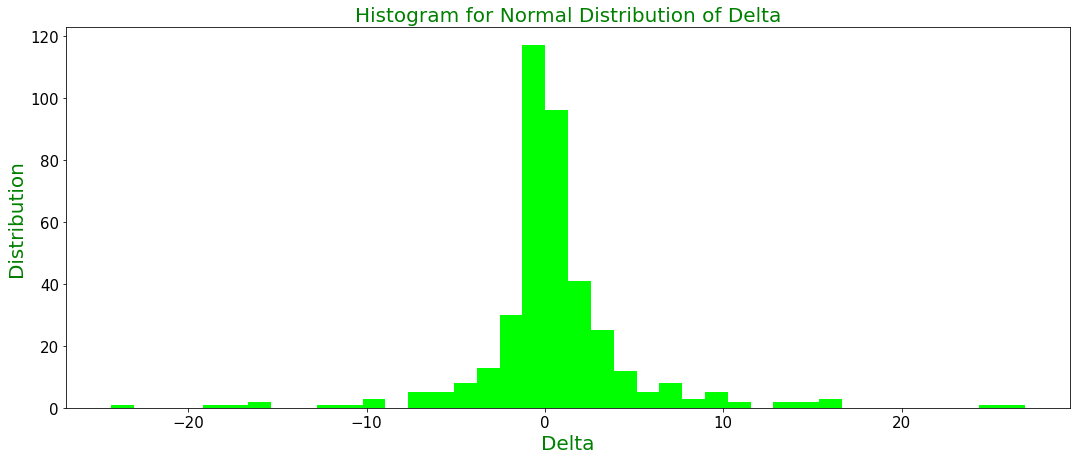

In [5]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.hist(df["Delta"], bins = 40, color = "lime")
ax.set_title("Histogram for Normal Distribution of Delta", size = 20, color = "green")
ax.set_xlabel("Delta", size = 20, color = "green")
ax.set_ylabel("Distribution", size = 20, color = "green")
ax.tick_params("y", labelsize = 15)
ax.tick_params("x", labelsize = 15)
plt.show()

**Convert Delta into numpy array**

In [6]:
delta = df["Delta"].values
delta[:5]

array([ 4.6, -2. ,  4.6, -5.1,  0.4])

###  Fitting distributions

,sumsquare_error,aic,bic,kl_div
lognorm,0.186926,1579.182266,-2997.506980,inf
beta,0.187060,1580.768529,-2991.249992,inf
norm,0.187563,1575.419105,-3002.143299,inf
gamma,0.188354,1561.765933,-2994.509547,inf
burr,0.232514,1442.333194,-2905.546287,inf


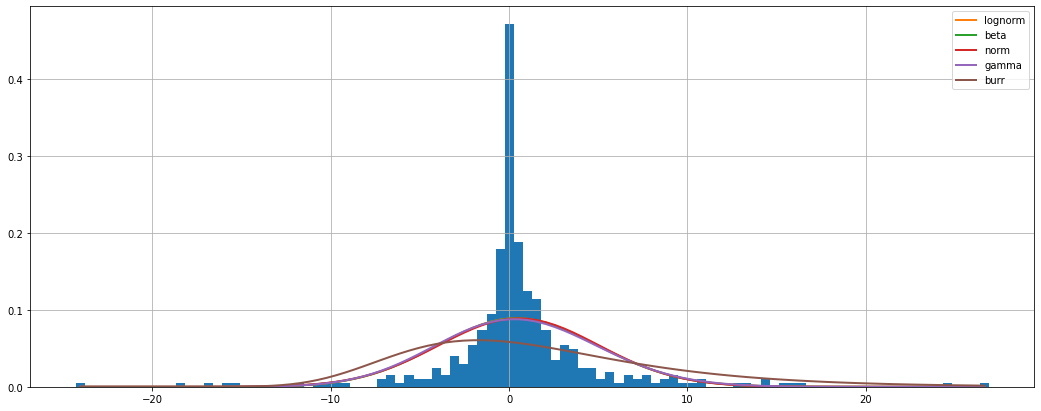

In [7]:
fig, ax = plt.subplots(figsize = (18, 7))
f = Fitter(delta,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

###  Identifying the best distribution

In [8]:
f.get_best(method = 'sumsquare_error')

{'lognorm': (0.02135225534766566, -209.18458494043585, 209.68215632800752)}

### Identifying the parameters

In [9]:
f.fitted_param["lognorm"]

(0.02135225534766566, -209.18458494043585, 209.68215632800752)

**Lognormal Distribution of Delta**

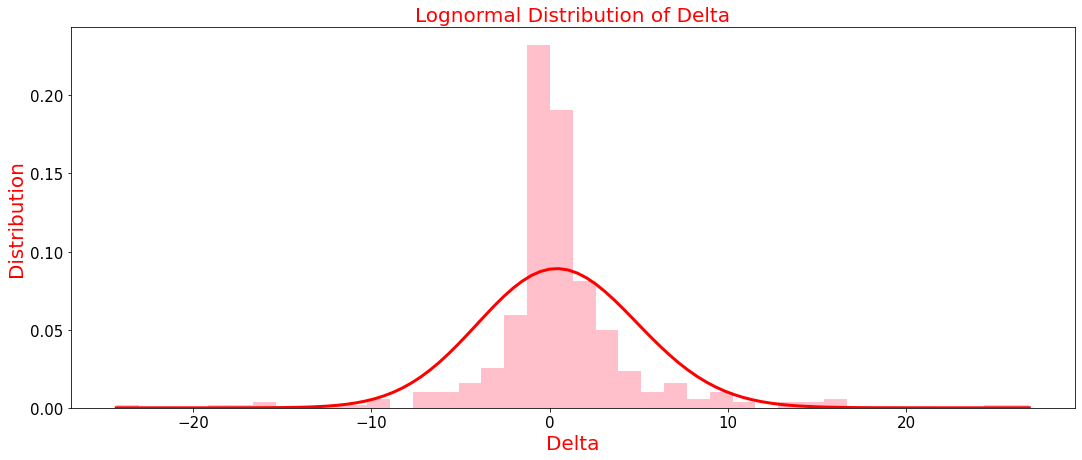

In [10]:
plt.figure(figsize = (18, 7))
shape, loc, scale = scipy.stats.lognorm.fit(delta)
plt.hist(delta, density=True, bins = 40, color = "pink")
x = np.linspace(delta.min(), delta.max(), 100)
plt.plot(x, scipy.stats.lognorm(shape, loc, scale).pdf(x), color = "red", linewidth = 3)

plt.title("Lognormal Distribution of Delta", size = 20, color = "red")
plt.xlabel("Delta", size = 20, color = "red")
plt.ylabel("Distribution", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Q-Q plot of Lognormal Distribution of Delta**

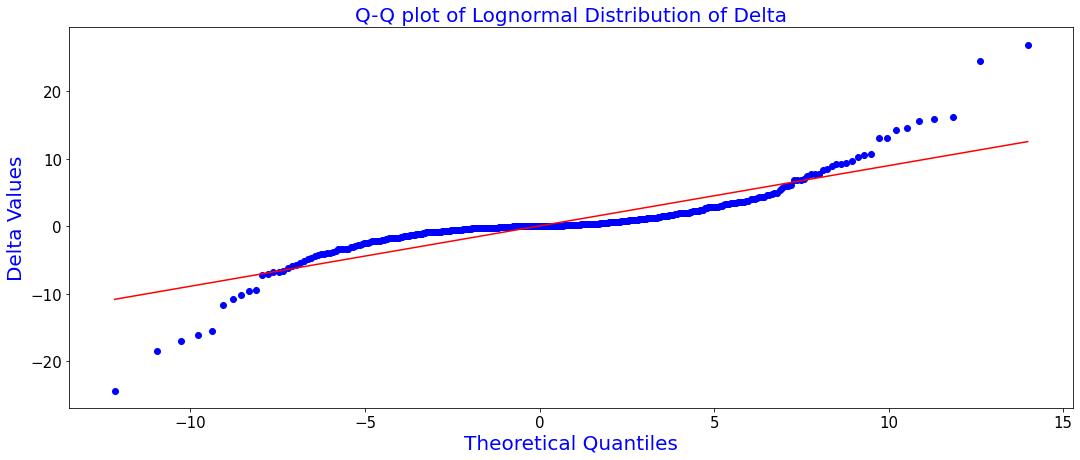

In [11]:
scipy.stats.probplot(delta, dist=scipy.stats.lognorm(shape,loc,scale), plot=plt.figure(figsize = (18, 7)).add_subplot(111))
plt.title("Q-Q plot of Lognormal Distribution of Delta", size = 20, color = "blue")
plt.xlabel("Theoretical Quantiles", color = "blue", size = 20)
plt.ylabel("Delta Values", color = "blue", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Z-Score**

In [12]:
df['zscore'] = (df["Delta"] - df["Delta"].mean())/df["Delta"].std(ddof=0)
df[:5]

,Observation Date,Delta,zscore
0,1988-07-01,4.6,0.903458
1,1988-08-01,-2.0,-0.567185
2,1988-09-01,4.6,0.903458
3,1988-10-01,-5.1,-1.257941
4,1988-11-01,0.4,-0.032406


**Percentile**

In [13]:
def assign_pct(X):
    mp = {}
    X_tmp = np.sort(X)
    pct = []
    cnt = 0
    for v in X_tmp:
        if v in mp:
            continue
        else:
            mp[v] = cnt
            cnt+=1
    for v in X:
        pct.append(mp[v]/cnt)
    return pct  

In [14]:
df["Percentile"] = assign_pct(df["Delta"])
df[:5]

,Observation Date,Delta,zscore,Percentile
0,1988-07-01,4.6,0.903458,0.832512
1,1988-08-01,-2.0,-0.567185,0.241379
2,1988-09-01,4.6,0.903458,0.837438
3,1988-10-01,-5.1,-1.257941,0.093596
4,1988-11-01,0.4,-0.032406,0.517241


**Lognormal**

In [15]:
df["Lognormal Values"] = scipy.stats.lognorm(shape, loc, scale).pdf(df["Delta"])
df[:5]

,Observation Date,Delta,zscore,Percentile,Lognormal Values
0,1988-07-01,4.6,0.903458,0.832512,0.057900
1,1988-08-01,-2.0,-0.567185,0.241379,0.077041
2,1988-09-01,4.6,0.903458,0.837438,0.057900
3,1988-10-01,-5.1,-1.257941,0.093596,0.041015
4,1988-11-01,0.4,-0.032406,0.517241,0.089126


**Lognormal Mean**

In [16]:
df["Lognormal Values"].mean()

0.07440709057166449

**Lognormal Standard Deviation**

In [17]:
df["Lognormal Values"].std()

0.024534633341373797